In [270]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

t = np.load("configurations_all.npy", allow_pickle = True)
print(type(t))
print("dtype:", t.dtype)
print("ndim: ", t.ndim)
print("shape:", t.shape)
print("size: ", t.size)
#print(t)


configurations = np.load("configurations_all.npy", allow_pickle = True)

print("#  | loss           | norm  | out_ac       | epochs | hidden layers |")
#print("--------------------------------------------------")
for i, result in enumerate(configurations):
    print("{0:2d} | {1:6.10f} | {2:5} | {3:12s} | {4:6d} | {5}".format(i, result[4], result[0], result[2], result[3], result[1]))
    #print("{0:2d} | {2:5} | {5} | {3:12s} | {4:6d} | {1:6.10f}".format(i, result[0], result[1], result[2], result[3], result[4]))
    if i == 1:
        break





#plt.hist(t['norm'],bins=5)
#plt.title('Absences')


<class 'numpy.ndarray'>
dtype: object
ndim:  2
shape: (1404, 5)
size:  7020
#  | loss           | norm  | out_ac       | epochs | hidden layers |
 0 | 582.8112925142 |     0 | linear       |     10 | [(16, 'relu'), (16, 'relu')]
 1 | 256.1239753383 |     0 | linear       |     30 | [(16, 'relu'), (16, 'relu')]


# Modelowanie danych 


In [271]:
#MODELING WHICH REMOVES ALL ROWS WHERE LOSS WAS HIGHER THAN 1
mask = np.ones(len(t), dtype=bool)


i=0
while i < len(t): 
    if(t[i,4] >1):
        mask[[i]] = False
    i+=1
    
    
result = t[mask, ...]
print(result)

[[False list([(16, 'relu'), (16, 'relu')]) 'sigmoid' 10
  0.3220518672292474]
 [False list([(16, 'relu'), (16, 'relu')]) 'sigmoid' 30
  0.3220518672292474]
 [False list([(16, 'relu'), (16, 'relu')]) 'sigmoid' 60
  0.3220518672292474]
 ...
 [True list([(64, 'relu'), (64, 'relu'), (64, 'relu'), (64, 'relu')])
  'sigmoid' 10 0.16672395462436335]
 [True list([(64, 'relu'), (64, 'relu'), (64, 'relu'), (64, 'relu')])
  'sigmoid' 30 0.16672395462436335]
 [True list([(64, 'relu'), (64, 'relu'), (64, 'relu'), (64, 'relu')])
  'sigmoid' 60 0.16672395462436335]]


In [272]:
#MODELING WHICH COUNTS HOW MANY HIDDEN ARRAYS WERE IN THE TEST 
hidden = []
i=0
while i < len(result): 
    if(len(result[i,1]) ==1):
        hidden.append(1)
    elif(len(result[i,1]) ==2):
        hidden.append(2)
    elif(len(result[i,1]) ==3):
        hidden.append(3)
    elif(len(result[i,1]) ==4):
        hidden.append(4)
    i+=1
print(len(hidden))

1100


In [273]:
#MODELING CHANGING VALUE OF NORM LABEL FROM STRING TO 0,1 
#LINEAR = 0
#SIGMOID = 1
activ = []

i=0
while i < len(result): 
    if(result[i,2] == "linear"):
        activ.append(0)
    elif(result[i,2] == "sigmoid"):
        activ.append(1)
   
    i+=1
    

print(type(activ))


<class 'list'>


In [274]:
loss = []
i=0
while i<len(result):
    loss.append(float(int(result[i,4]*100)))
    i+=1


# Wykresy zależności parametru loss od kilku wartości

['sigmoid' 'sigmoid' 'sigmoid' ... 'sigmoid' 'sigmoid' 'sigmoid']


Text(0, 0.5, 'Loss')

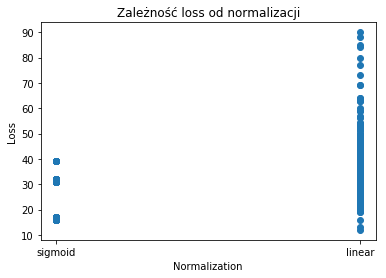

In [319]:
#CREATING SOME ARRAYS WITH VAL
#loss = result[:,4]
norm = result[:,0]
epochs = result[:,3]
#activ = result[:,2]

#print(loss)
#print(norm)

#fig, axs = plt.subplots(1,2,figsize = (9,2), sharey = True)
#axs[0].scatter(norm, loss)
#fig.suptitle('NormToLoss')

plt.figure()
plt.scatter(result[:,2], loss)
plt.title('Zależność loss od normalizacji')
plt.xlabel('Normalization')
plt.ylabel("Loss")


Text(0.5, 1.0, 'epochs to loss')

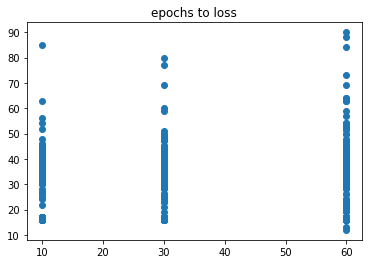

In [276]:
plt.figure()
plt.scatter(epochs, loss)
plt.title('epochs to loss')


Text(0.5, 1.0, 'function of activation to loss')

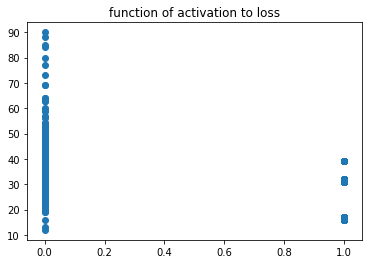

In [277]:
plt.figure()
plt.scatter(activ, loss)
plt.title('function of activation to loss')

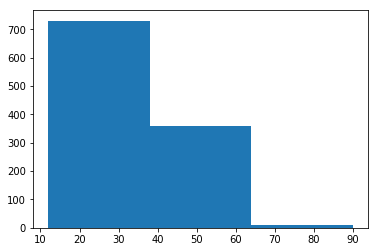

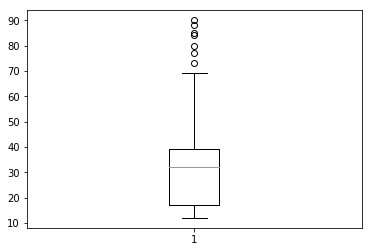

In [313]:
plt.figure()
plt.hist(loss, bins = 3)
plt.show()
plt.figure()
plt.boxplot(loss)
plt.show()

# Przygotowanie danych treningowych

In [279]:
from sklearn.model_selection import train_test_split

dn = pd.DataFrame(norm)
de = pd.DataFrame(epochs)
da = pd.DataFrame(activ)
dl = pd.DataFrame(loss)
dh = pd.DataFrame(hidden)
#print (t[:,4].value_counts())

df = pd.DataFrame({ 
    'Norm': norm,
    'Epochs': epochs,
    'Activ': activ,
    'Hidden': hidden,
    'Loss': loss})
print(df.head(4))

x_values =df[['Norm', 'Epochs', 'Activ', 'Hidden']]
y_values = df['Loss']
print(len(y_values))
print(len(x_values))







    Norm Epochs  Activ  Hidden  Loss
0  False     10      1       2  32.0
1  False     30      1       2  32.0
2  False     60      1       2  32.0
3  False     10      1       2  31.0
1100
1100


# Najlepsze modele posortowane po największej dokładności

In [296]:
r = pd.DataFrame({ 
    'Norm': norm,
    'Epochs': epochs,
    'Activ': activ,
    'Hidden': result[:,1],
    'Loss': loss})

vis = r.sort_values(by = ['Loss'], ascending = True)
print(vis.head(20))

      Norm Epochs  Activ                                            Hidden  \
211  False     60      0  [(32, relu), (16, relu), (16, relu), (32, relu)]   
314  False     60      0  [(64, relu), (16, relu), (32, relu), (64, relu)]   
702   True     30      1  [(16, relu), (32, relu), (32, relu), (64, relu)]   
703   True     60      1  [(16, relu), (32, relu), (32, relu), (64, relu)]   
713   True     10      1  [(16, relu), (32, relu), (64, relu), (32, relu)]   
714   True     30      1  [(16, relu), (32, relu), (64, relu), (32, relu)]   
715   True     60      1  [(16, relu), (32, relu), (64, relu), (32, relu)]   
719   True     10      1  [(16, relu), (32, relu), (64, relu), (64, relu)]   
720   True     30      1  [(16, relu), (32, relu), (64, relu), (64, relu)]   
721   True     60      1  [(16, relu), (32, relu), (64, relu), (64, relu)]   
725   True     10      1  [(16, relu), (64, relu), (16, relu), (16, relu)]   
726   True     30      1  [(16, relu), (64, relu), (16, relu), (

In [281]:
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.25,random_state=10)

In [282]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)
print(x_train_scale)



[[-1.31597419 -0.2223119  -1.35105235  0.62015564]
 [-1.31597419 -1.19016055  0.74016377 -1.00406152]
 [ 0.75989332 -1.19016055  0.74016377  0.62015564]
 ...
 [ 0.75989332 -0.2223119   0.74016377  0.62015564]
 [ 0.75989332  1.22946107  0.74016377  0.62015564]
 [ 0.75989332 -1.19016055  0.74016377 -1.00406152]]


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  import sys


# Trening na podstawie KNN

In [283]:
# Create an empty list to store the accuracy and number of neighbours for each KNN model
accuracy = []
num_neigh = []

# Use ii to cycle through values 1 to 15. This will be the number of neighbours for the KNN classifier. 
for ii in range(1,60):
    # Set number of neighbours to ii
    KNN = KNeighborsClassifier(n_neighbors=ii)
    # Training or fitting the model with the data
    KNN.fit(x_train_scale,y_train)
    # .score provides the accuracy of the model based on the testing data. Store the accuracy into the list.
    accuracy.append(KNN.score(x_test_scale,y_test))
    # Append the number of neighbours to a list
    num_neigh.append(ii)

print(accuracy)

[0.32727272727272727, 0.31636363636363635, 0.32727272727272727, 0.32, 0.3054545454545455, 0.3381818181818182, 0.33090909090909093, 0.34545454545454546, 0.3418181818181818, 0.3563636363636364, 0.3527272727272727, 0.3418181818181818, 0.36363636363636365, 0.3563636363636364, 0.3527272727272727, 0.38181818181818183, 0.3709090909090909, 0.37454545454545457, 0.39636363636363636, 0.36363636363636365, 0.3709090909090909, 0.3709090909090909, 0.38545454545454544, 0.4036363636363636, 0.4036363636363636, 0.4072727272727273, 0.4072727272727273, 0.4109090909090909, 0.4072727272727273, 0.4218181818181818, 0.41818181818181815, 0.4218181818181818, 0.41818181818181815, 0.3927272727272727, 0.4218181818181818, 0.4218181818181818, 0.4218181818181818, 0.41454545454545455, 0.41454545454545455, 0.4072727272727273, 0.4218181818181818, 0.41454545454545455, 0.41454545454545455, 0.4072727272727273, 0.4109090909090909, 0.4072727272727273, 0.4109090909090909, 0.41818181818181815, 0.4072727272727273, 0.4181818181818

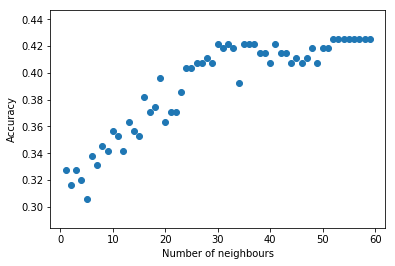

In [284]:
plt.scatter(num_neigh,accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show();

In [285]:
KNN = KNeighborsClassifier(n_neighbors=30)
KNN = KNN.fit(x_train_scale,y_train)

In [286]:
y_predict = KNN.predict(x_test_scale)
print(y_predict)
print(y_predict.dtype)

[16. 35. 39. 37. 16. 39. 16. 29. 29. 16. 16. 35. 16. 39. 16. 39. 37. 39.
 35. 17. 16. 16. 42. 35. 16. 39. 39. 39. 35. 39. 16. 16. 16. 16. 36. 36.
 39. 19. 39. 39. 35. 16. 39. 37. 35. 39. 29. 39. 39. 19. 39. 39. 39. 37.
 16. 19. 42. 16. 35. 31. 39. 16. 39. 39. 16. 39. 39. 39. 29. 42. 16. 37.
 16. 35. 42. 39. 16. 39. 39. 16. 37. 37. 29. 39. 39. 39. 39. 16. 16. 40.
 39. 39. 39. 39. 39. 40. 35. 16. 39. 37. 39. 37. 16. 36. 35. 16. 16. 16.
 37. 37. 39. 16. 19. 39. 16. 42. 39. 39. 39. 37. 39. 39. 16. 37. 39. 16.
 39. 39. 39. 40. 39. 39. 39. 16. 16. 42. 39. 16. 39. 16. 16. 39. 42. 39.
 16. 39. 16. 35. 19. 39. 16. 37. 39. 39. 19. 39. 16. 39. 36. 39. 16. 39.
 39. 39. 42. 39. 16. 19. 16. 16. 16. 19. 16. 39. 40. 39. 39. 39. 16. 16.
 16. 39. 16. 37. 16. 29. 40. 39. 39. 39. 16. 39. 19. 39. 39. 16. 31. 39.
 37. 16. 39. 16. 16. 19. 37. 16. 36. 29. 16. 16. 29. 16. 16. 16. 39. 16.
 16. 17. 39. 19. 39. 16. 37. 16. 39. 16. 39. 16. 39. 37. 35. 39. 16. 39.
 16. 16. 29. 39. 19. 39. 39. 42. 39. 16. 16. 39. 39

In [287]:
from sklearn.metrics import confusion_matrix  
print(confusion_matrix(y_test, y_predict))  

[[ 0  0  0 ...  0  0  0]
 [ 0 65  0 ...  0  0  0]
 [ 0 19  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


# Wizualizacja dokładności za pomocą heatmapy

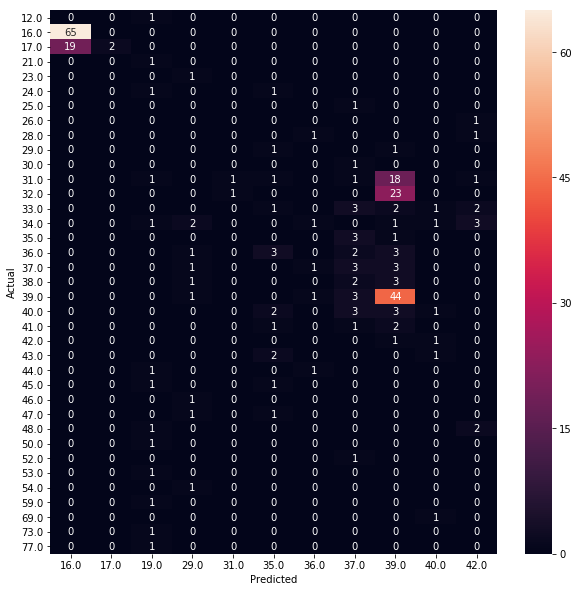

In [288]:
import seaborn as sns

# Create new dataframe
df = pd.DataFrame()

# Create new columns within dataframe
df['Actual'] = y_test
df['Predicted'] = y_predict

freq, ax = plt.subplots(figsize=(10,10)) 
# Use pd.crosstab to count the frequency of the classes in actual and predicted
#freq = pd.crosstab(df.Actual,df.Predicted)
freq = pd.crosstab(df.Actual,df.Predicted)
# Use sns.heatmap to plot the heatmap
sns.heatmap(freq,annot=True,fmt="d", ax = ax)

# Input testowy dla użytkownika przewidujący wartość parametru loss

In [289]:
test = pd.DataFrame()
KNN2 = KNeighborsClassifier(n_neighbors=30)
KNN2 = KNN.fit(x_train_scale,y_train)

test['Norm']= [input('Normalized (1 or 0): ')]
test['Epochs']= [input('Enter epochs number (10,20,60): ')]
test['Activ']=[input('Enter activator (linear = 0, sigmoid = 1): ')]
test['Hidden']= [input('Enter number of hidden layers (2,3,4): ' )]

predict_test2= KNN2.predict(test)
print('Predicted loss: ',predict_test2, '%')


Normalized (1 or 0):  0
Enter epochs number (10,20,60):  60
Enter activator (linear = 0, sigmoid = 1):  1
Enter number of hidden layers (2,3,4):  2


Predicted loss:  [16.] %
